In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [49]:
data = pd.read_csv("L2_data_group3.txt",delimiter="\t")

In [50]:
data.describe()

,Before,After
count,50.000000,50.000000
mean,198.082600,253.613200
std,26.693944,44.167379
min,132.040000,163.320000
25%,177.687500,227.572500
50%,196.485000,247.600000
75%,222.032500,267.550000
max,250.970000,443.140000


In [51]:
data.head()

,Before,After
0,171.14,242.95
1,191.22,216.94
2,207.76,265.78
3,165.44,163.32
4,205.87,213.53


# Simple plot to visualize outliers

In [52]:
data['differences'] = data["After"]-data['Before']

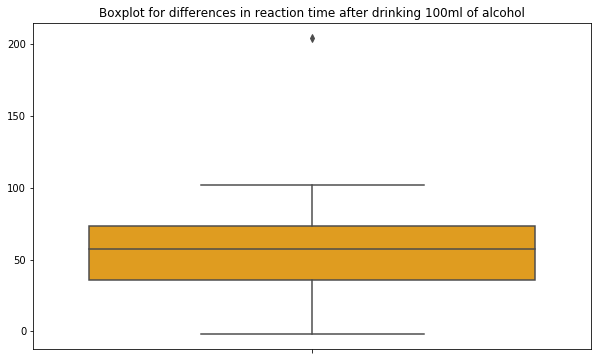

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(y=differences,color='orange')
plt.title("Boxplot for differences in reaction time after drinking 100ml of alcohol")
plt.show()

Based on this boxplot we can see that outlied sample has got difference in reaction time in around ~200 ms. Now we can perform Tukey test to detect this and maybe other outlied samples. 

# Tukey test

In [55]:
def tukey_outliers(df, column): 
  Q1 = np.percentile(df[column], 25)
  Q3 = np.percentile(df[column], 75)
  IQR = Q3 - Q1
  outlier_step = 1.5 * IQR
  outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
  return outliers_index

In [36]:
outliers_index = tukey_outliers(data, 'differences')

In [56]:
len(outliers_index) 

1

Tukey test found only one outlier in considered dataset. Now we can drop this outlied sample.

In [58]:
data.drop(outliers_index, inplace=True)

# Histogram

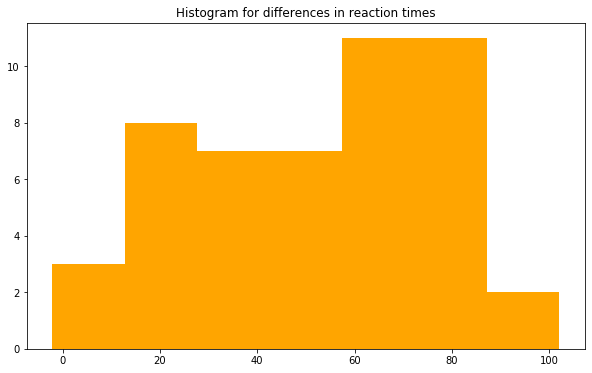

In [59]:
plt.figure(figsize=(10,6))
x = len(data["differences"])
binsizes = math.sqrt(x)
plt.hist(data["differences"], bins = int(binsizes),color='orange')
plt.title('Histogram for differences in reaction times')
plt.show()

The data is not normally distributed.

# Hypothesis and paired sampled t-test

- H0: There is no difference in reaction time before and after drinking 100ml of alcohol in population of 50 drivers.
- H0: u1 == u2

- Ha: There is a difference in reaction time before and after drinking 100ml of alcohol in population of 50 drivers.
- Ha: u1 != u2 

In [46]:
ttest,pval = stats.ttest_rel(data['Before'], data['After'])
print(pval)
if pval<0.05:
    print("The p value is lower than p < 0,05, so we can reject the null hypothesis.")
else:
    print("The p value is not lower than p < 0,05, so we can not reject the null hypothesis.")


1.94533467005807e-19
The p value is lower than p < 0,05, so we can reject the null hypothesis.


# Conclusion

Based on p value obtained in paired sampled t-test, we can assume that there is a difference in reaction times after consuming 100ml of alcohol for the population under study. 